# **Bank Marketing Dataset :**

---



##Overview

The data is related with direct marketing campaigns (phone calls) of a



Portuguese banking institution.


The classification goal is to predict if the client will subscribe a term deposit (variable y).


Source : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

The data is related with direct marketing campaigns of a Portuguese banking institution.

The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,

in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.



## What is a Term Deposit ?
A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate

(often better than just opening deposit account) in which your money will be returned back at a specific maturity time.

The classification goal is to predict if the client will subscribe (yes / no) a term deposit (variable 'y').

## Summay of data
###Categorical Variables :

1.   job : type of job (admin,technician, services, management, retired, blue-collar,unemployed, entrepreneur, housemaid, unknown, self-employed, student)
2.   marital : marital status (married, single, divorced)
3. education: education status (blue-collar, entrepreneur, retired, admin, student, services,
 technician, self-employed, management, unemployed, unknown, housemaid)
4. default : has credit in default? (binary: "yes","no")
5. housing : has housing loan? (binary: "yes","no")
6. loan :  has personal loan? (binary: "yes","no")
### related with the last contact of the current campaign:
7. contact : contact communication type (categorical: "unknown","telephone","cellular")
8. month : last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
9. day_of_week : last contact day of the week (mon, tue, wed, thu, fir)
10. poutcome: outcome of the previous marketing campaign (categorical: "unknown","failure","success")

11. y :  has the client subscribed a term deposit? (binary: "yes","no")(dependent variable)



###Numerical Variables:
1. age : Age of the Client
2. duration :  last contact duration, in seconds
3. campaign : number of contacts performed during this campaign and for this client
4. pdays : number of days that passed by after the client was last contacted from a previous campaign
5. previous : number of contacts performed before this campaign and for this client


## **Data Preparation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

## **Data Loading and Exploration | Cleaning**

### Load The Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSet/Supervised learning Project/Bank Marketing.csv')

Set the option to show maximum columns

In [ ]:
pd.set_option('display.max_columns', None)

Get a sneak peek of data

In [ ]:
# print the sample 5 rows of the dataframe
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
26083,46,admin.,married,university.degree,unknown,yes,no,cellular,aug,tue,165,2,999,0,nonexistent,no
535,54,technician,married,university.degree,unknown,no,yes,telephone,may,mon,123,7,999,0,nonexistent,no
19606,42,blue-collar,married,basic.4y,no,yes,no,telephone,may,mon,798,1,999,0,nonexistent,no
17900,28,student,single,high.school,no,yes,yes,cellular,jul,mon,154,1,999,2,failure,no
23078,35,admin.,divorced,university.degree,no,yes,yes,cellular,apr,mon,121,1,999,0,nonexistent,yes


In [ ]:
df.rename(columns={'y': 'term_deposite'}, inplace=True)

here I m replacing the target coloumn name **y** with **Term_deposite**

### **Explore The Data**

In [ ]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32950 non-null  int64 
 1   job            32950 non-null  object
 2   marital        32950 non-null  object
 3   education      32950 non-null  object
 4   default        32950 non-null  object
 5   housing        32950 non-null  object
 6   loan           32950 non-null  object
 7   contact        32950 non-null  object
 8   month          32950 non-null  object
 9   day_of_week    32950 non-null  object
 10  duration       32950 non-null  int64 
 11  campaign       32950 non-null  int64 
 12  pdays          32950 non-null  int64 
 13  previous       32950 non-null  int64 
 14  poutcome       32950 non-null  object
 15  term_deposite  32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


### Let's have a look on the shape of the dataset

In [ ]:
# data shpae
df.shape

(32950, 16)

### Lets see the column name

In [ ]:
# Lets see the column name
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'term_deposite'],
      dtype='object')

### Descriptive Statistics

In [ ]:
# Summary Statistics
df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


Let's check the Unique Values for Each coloumn

In [ ]:
for column in df.columns:
  print(f"{column}: {df[column].unique()}")


age: [49 37 78 36 59 29 26 30 50 33 44 32 43 56 40 47 34 46 39 41 55 38 63 23
 48 53 35 51 71 58 21 45 25 77 28 52 80 57 22 60 27 24 31 42 54 81 64 79
 20 76 82 19 68 65 73 66 85 74 61 86 69 18 83 88 70 87 84 75 62 72 67 89
 17 91 98]
job: ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'unknown'
 'housemaid']
marital: ['married' 'divorced' 'single' 'unknown']
education: ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'unknown' 'basic.6y' 'illiterate']
default: ['unknown' 'no' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['cellular' 'telephone']
month: ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']
day_of_week: ['wed' 'mon' 'tue' 'fri' 'thu']
duration: [ 227  202 1148 ... 1882 1666 1434]
campaign: [ 4  2  1  5  9  3  7  6 13  8 12 10 19 11 31 17 16 29 43 20 14 21 35 15
 33 28 22 25 18 23 27 26 24 34 32 37 30 42 40 56]
pdays: [999  

Here we can see that we have unknown records in the job,marital,education,housing,default and loan so let replace the unknown with a value

In [ ]:
df['job'] = df['job'].replace('unknown', df['job'].mode()[0])
df['marital'] = df['marital'].replace('unknown', df['marital'].mode()[0])
df['education'] = df['education'].replace('unknown', df['education'].mode()[0])
df['housing'] = df['housing'].replace('unknown', df['housing'].mode()[0])
df['default'] = df['default'].replace('unknown', df['default'].mode()[0])
df['loan'] = df['loan'].replace('unknown', df['loan'].mode()[0])


here I have replaced the unknown with mode of the each features

### Dealing with Missing Values

In [ ]:
df.isnull().sum()

age              0
job              0
marital          0
education        0
default          0
housing          0
loan             0
contact          0
month            0
day_of_week      0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
term_deposite    0
dtype: int64

There are no missing values in the dataset.

## **Data Visualization**

<Axes: >

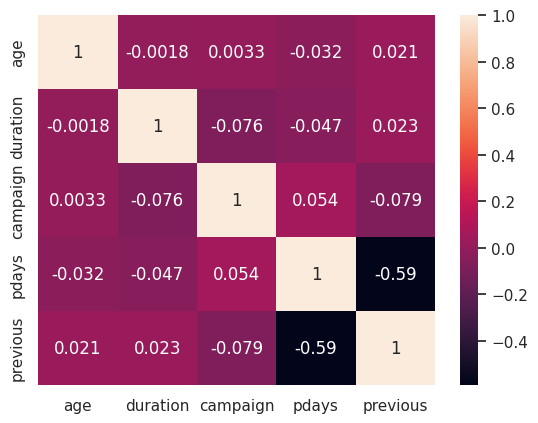

In [ ]:
sns.heatmap(df.corr(), annot = True)

Here i have checked the correlation in the heatmap and I have observed that pdays and previous have moderate negative correlation

<Axes: xlabel='marital', ylabel='count'>

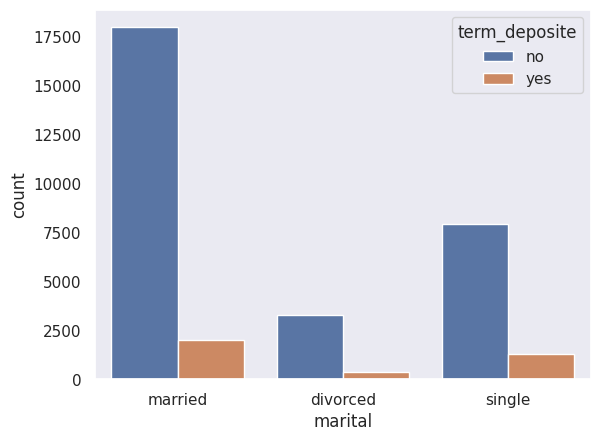

In [ ]:
sns.countplot(data = df, x = 'marital', hue = 'term_deposite')

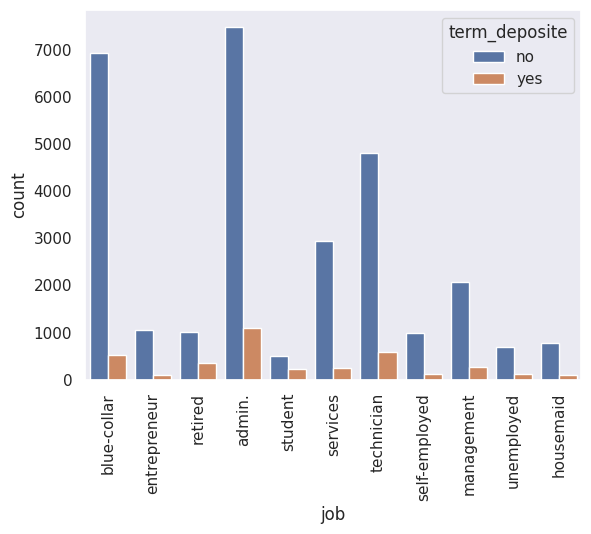

In [ ]:
sns.countplot(data = df, x = 'job', hue = 'term_deposite').tick_params(axis='x', rotation=90)

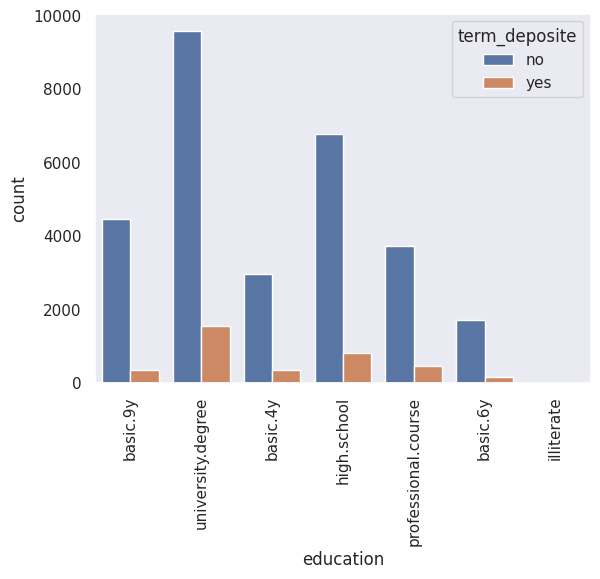

In [ ]:
sns.countplot(data = df, x = 'education', hue = 'term_deposite').tick_params(axis='x', rotation=90)

<Axes: xlabel='day_of_week', ylabel='count'>

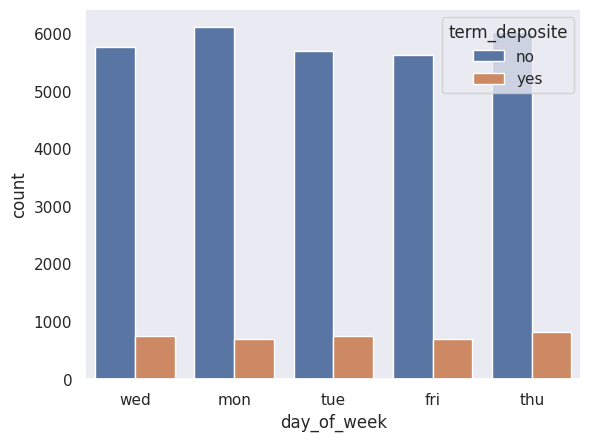

In [ ]:
sns.countplot(data=df, x ='day_of_week', hue = 'term_deposite')

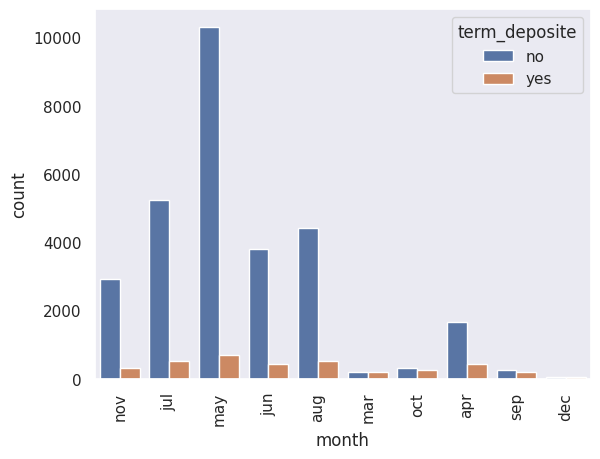

In [ ]:
sns.countplot(data = df, x = 'month', hue = 'term_deposite').tick_params(axis='x', rotation=90)

<Axes: xlabel='default', ylabel='count'>

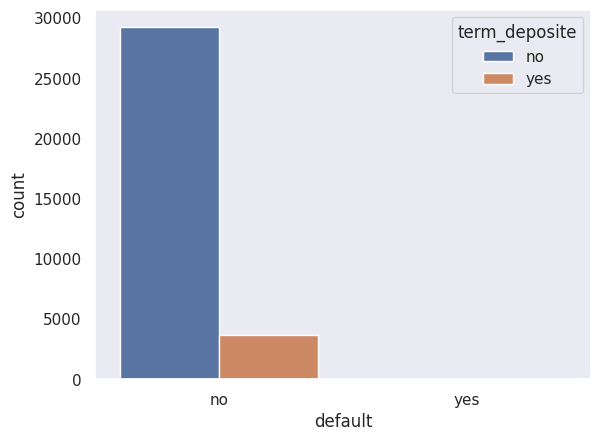

In [ ]:
sns.countplot(data = df, x = 'default', hue = 'term_deposite')

In [ ]:
df['default'].value_counts()

no     32947
yes        3
Name: default, dtype: int64

there are only 3 people have credit and rest of them don't have credit

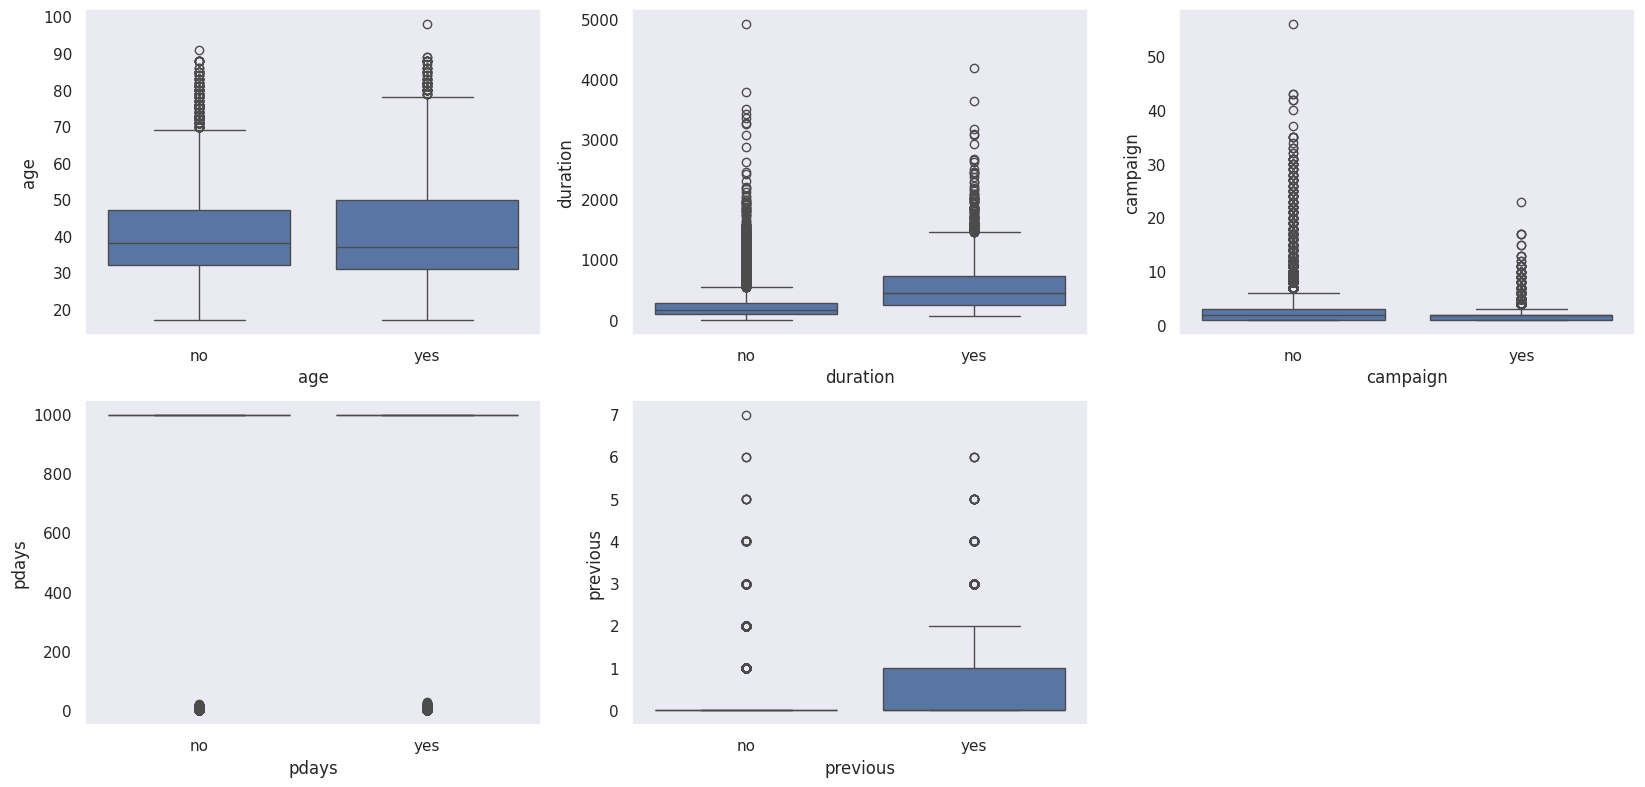

In [ ]:
num_features=['age', 'duration',
       'campaign', 'pdays', 'previous']

# boxplot to show target distribution with respect numerical features

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in num_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="term_deposite", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

Above boxplot suggest how the data is spread across the dataset **Most of the data is lying above the 3rd quantile by multiplication factor of 1.5 i.e. by theortical aspect the data points are outlier for most of the data points**.

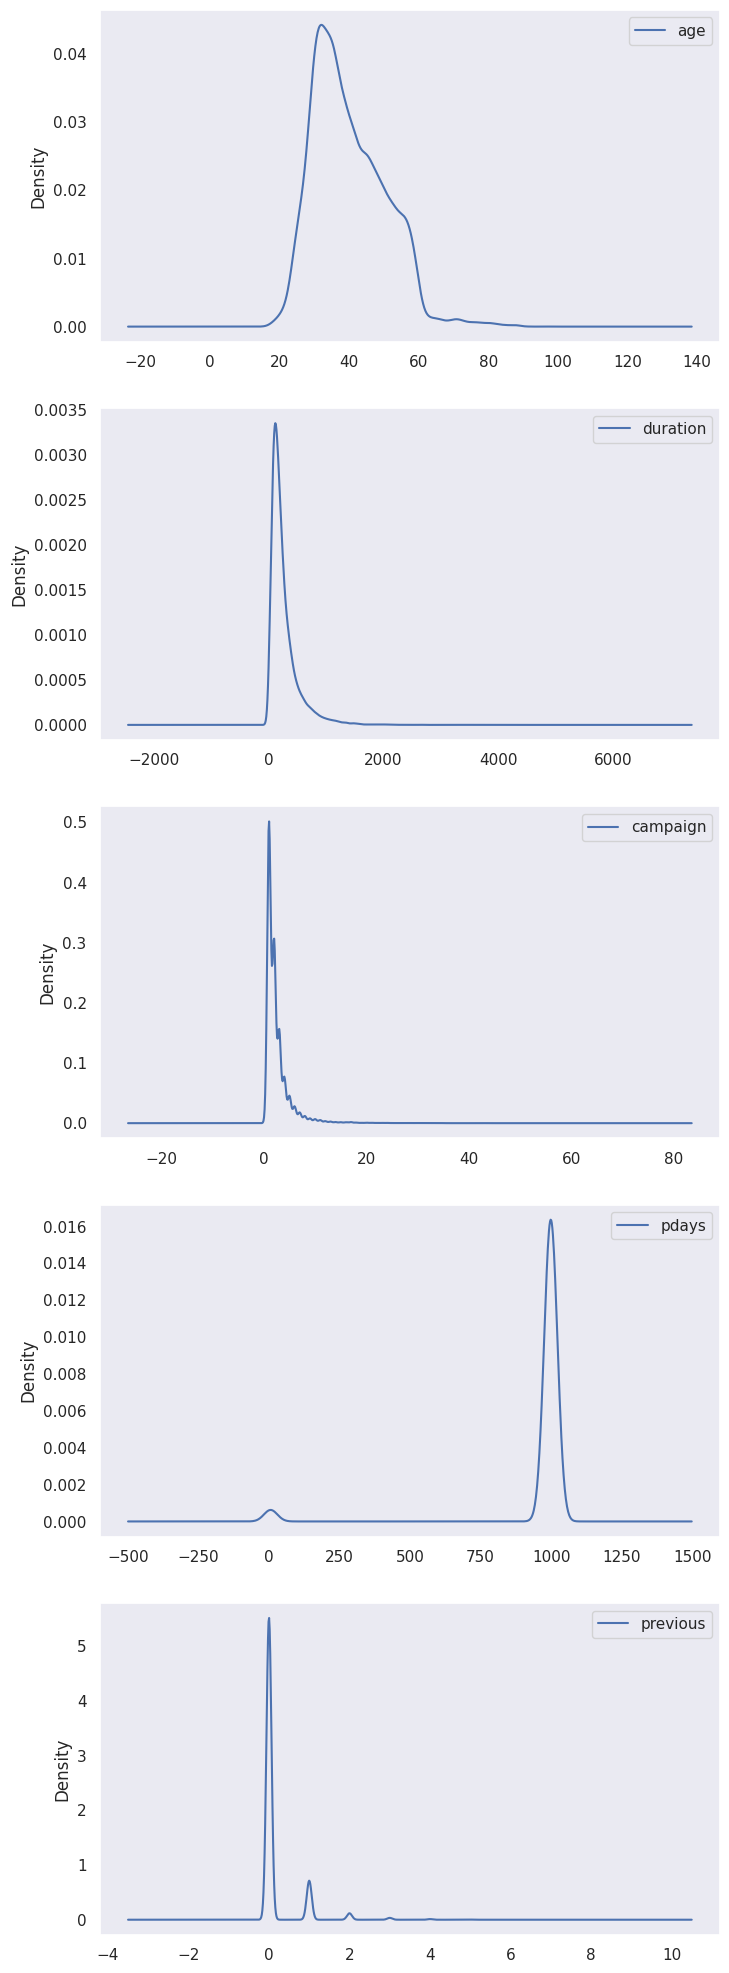

In [ ]:
# Kernel Density Estimation plot for each numerical feature

fig, axes = plt.subplots(5, 1, figsize=(8, 25))
for i, c in enumerate(num_features):
    f = df[[c]].plot(kind='kde',ax=axes[i])

Above, All the Kernel Density Estimation suggest that data is skewed towards left i.e. existence of skewness brings us to a point that we need to sample the data efficiently while classifiying the train_data and test_data !

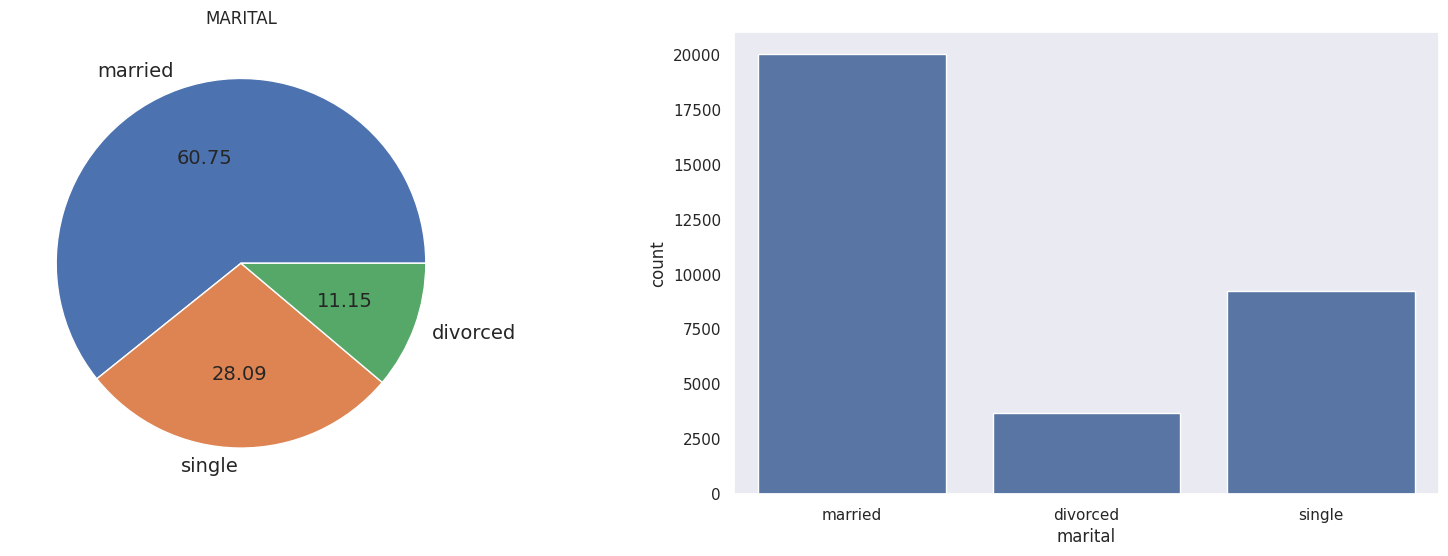

In [ ]:
# Pie and count plot for Categorical feature

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
data = df['marital'].value_counts()
barplot = data.plot(kind='pie', ax=axes[0], title='MARITAL', autopct="%.2f", fontsize=14, ylabel='')
countplot = sns.countplot(x='marital', data=df, ax=axes[1])

<Axes: xlabel='term_deposite', ylabel='count'>

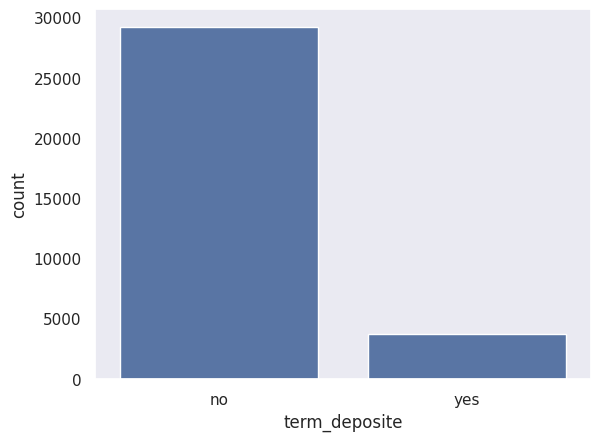

In [ ]:
sns.countplot(x = df['term_deposite'])

In [ ]:
target_count = df ['term_deposite'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')
print('Proportion of class 1 is ', round(target_count[1] * 100 / (target_count[0] + target_count[1]), 2),'%')

Class 0: 29238
Class 1: 3712
Proportion of class 0 is  88.73 %
Proportion of class 1 is  11.27 %


Here the data is Imbalance let's apply the Algorithms if it's over fitting then let's apply SMOTE!

## **Data Preprocessing**

Let's convert all the Objects into Category

In [ ]:
categorical_columns = ['job', 'marital', 'education','default','housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'term_deposite']
for column in categorical_columns:
  df[column] = df[column].astype('category')


let's check the data types all of them are converted or we have missed anything

In [ ]:
df.dtypes

age                 int64
job              category
marital          category
education        category
default          category
housing          category
loan             category
contact          category
month            category
day_of_week      category
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome         category
term_deposite    category
dtype: object

Let's Define X and Y dataset where X stores all the independent variable and Y stores the dependent variable i.e Target feature

In [ ]:
X = df.drop(['term_deposite'], axis=1)
Y = df[['term_deposite']]

## **Encoding**

Let's to lable encoding for the Target Feature

In [ ]:
le = LabelEncoder()
Y=le.fit_transform(Y)

let's store all the category features

In [ ]:
cat_cols=df.select_dtypes(include=['category'])
cat_cols=cat_cols.drop(["term_deposite"],axis=1)
cat_cols=cat_cols.columns

let's store all the category features

In [ ]:
num_cols=df.select_dtypes(include=['int64'])
num_cols=num_cols.columns

Let's do one-hot encoding for the all Feature expect the Target feature

In [ ]:
X = pd.get_dummies(X, columns=cat_cols,drop_first=True)

## **Scaling**

Here we are doing StandardScaler

In [ ]:
#scaling
scaler = StandardScaler()
# scale on train
X[num_cols] =scaler.fit_transform(X[num_cols])

## **Splitting the Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, stratify = Y,test_size=0.3,random_state=0,shuffle=True)
print('X_Train Size:', (X_train.shape))
print('X _test Size:', (X_test.shape))
print('Y_train Size:', (y_train.shape))
print('Y_test Size:', (y_test.shape))

X_Train Size: (23065, 42)
X _test Size: (9885, 42)
Y_train Size: (23065,)
Y_test Size: (9885,)


## **Model & Evaluation**

# Evaluation

In [ ]:
# Function for Classification Report

def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            ------------------------------------------
            |  CLASSIFICATION REPORT FOR TRAIN DATA  |
            ------------------------------------------
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            ------------------------------------------
            |   CLASSIFICATION REPORT FOR TEST DATA  |
            ------------------------------------------
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

#defining error metrics
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])
scores1 = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted,average="macro")
    train_precision= precision_score(train_actual,train_predicted,average="macro")
    train_f1score  = f1_score(train_actual,train_predicted,average="macro")
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted,average="macro")
    test_precision= precision_score(test_actual,test_predicted,average="macro")
    test_f1score  = f1_score(test_actual,test_predicted,average="macro")
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

## Model Bulding

Train Accuracy: 1.0
Test Accuracy: 0.8755690440060698

            ------------------------------------------
            |  CLASSIFICATION REPORT FOR TRAIN DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     20467
           1     1.0000    1.0000    1.0000      2598

    accuracy                         1.0000     23065
   macro avg     1.0000    1.0000    1.0000     23065
weighted avg     1.0000    1.0000    1.0000     23065


            ------------------------------------------
            |   CLASSIFICATION REPORT FOR TEST DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     0.9317    0.9278    0.9297      8771
           1     0.4496    0.4641    0.4567      1114

    accuracy                         0.8756      9885
   macro avg     0.6906    0.6960    0.6932

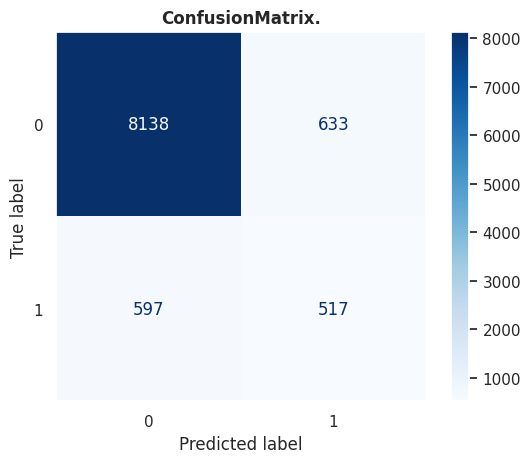

In [ ]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X=X_train, y= y_train)

y_pred_train = clf_dt.predict(X_train)
y_pred_test = clf_dt.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores1 = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"Decision Tree",scores1)

cm_test = confusion_matrix(y_test, y_pred_test)
matrix = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [0, 1])
matrix.plot(cmap="Blues")
plt.title("ConfusionMatrix.", weight="bold");

Train Accuracy: 1.0
Test Accuracy: 0.9101669195751139

            ------------------------------------------
            |  CLASSIFICATION REPORT FOR TRAIN DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     20467
           1     1.0000    1.0000    1.0000      2598

    accuracy                         1.0000     23065
   macro avg     1.0000    1.0000    1.0000     23065
weighted avg     1.0000    1.0000    1.0000     23065


            ------------------------------------------
            |   CLASSIFICATION REPORT FOR TEST DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     0.9274    0.9751    0.9507      8771
           1     0.6707    0.3986    0.5000      1114

    accuracy                         0.9102      9885
   macro avg     0.7990    0.6869    0.7253

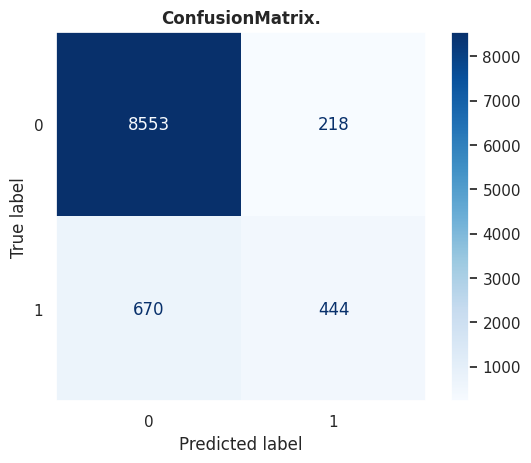

In [ ]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X=X_train, y= y_train)

y_pred_train = clf_rf.predict(X_train)
y_pred_test = clf_rf.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores1 = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"RandomForestClassifier",scores1)

cm_test = confusion_matrix(y_test, y_pred_test)
matrix = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [0, 1])
matrix.plot(cmap="Blues")
plt.title("ConfusionMatrix.", weight="bold");

Train Accuracy: 0.9145024929546932
Test Accuracy: 0.9085483055134042

            ------------------------------------------
            |  CLASSIFICATION REPORT FOR TRAIN DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     0.9256    0.9827    0.9533     20467
           1     0.7343    0.3776    0.4987      2598

    accuracy                         0.9145     23065
   macro avg     0.8299    0.6801    0.7260     23065
weighted avg     0.9040    0.9145    0.9021     23065


            ------------------------------------------
            |   CLASSIFICATION REPORT FOR TEST DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     0.9225    0.9792    0.9500      8771
           1     0.6829    0.3519    0.4645      1114

    accuracy                         0.9085      9885
   macro avg     0.8027    0

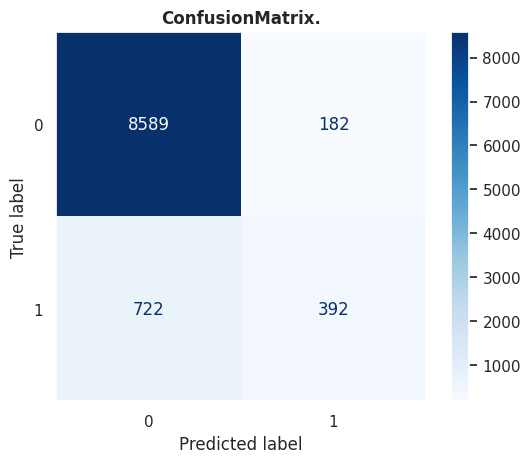

In [ ]:
# SVM
from sklearn.svm import SVC
clf_svc = SVC()
clf_svc.fit(X=X_train, y= y_train)

y_pred_train = clf_svc.predict(X_train)
y_pred_test = clf_svc.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores1 = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"SVMCLASSIFIER",scores1)

cm_test = confusion_matrix(y_test, y_pred_test)
matrix = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [0, 1])
matrix.plot(cmap="Blues")
plt.title("ConfusionMatrix.", weight="bold");

Train Accuracy: 0.9518751354866681
Test Accuracy: 0.9081436519979768

            ------------------------------------------
            |  CLASSIFICATION REPORT FOR TRAIN DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     0.9597    0.9872    0.9733     20467
           1     0.8701    0.6732    0.7591      2598

    accuracy                         0.9519     23065
   macro avg     0.9149    0.8302    0.8662     23065
weighted avg     0.9496    0.9519    0.9491     23065


            ------------------------------------------
            |   CLASSIFICATION REPORT FOR TEST DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     0.9349    0.9635    0.9490      8771
           1     0.6217    0.4722    0.5367      1114

    accuracy                         0.9081      9885
   macro avg     0.7783    0

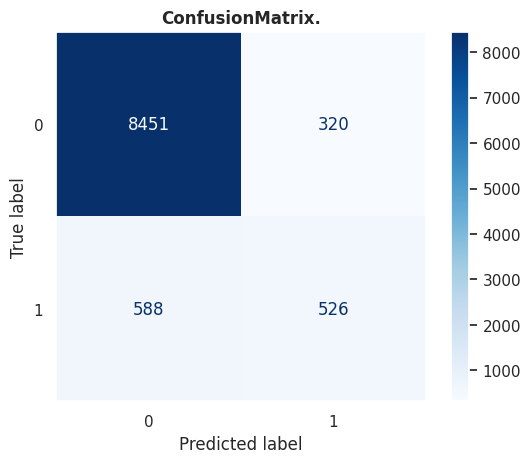

In [ ]:
# XGBClassifier

from xgboost import XGBClassifier
clf_XGB = XGBClassifier()
clf_XGB.fit(X=X_train, y= y_train)

y_pred_train = clf_XGB.predict(X_train)
y_pred_test = clf_XGB.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores1 = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"XGBOOST",scores1)

cm_test = confusion_matrix(y_test, y_pred_test)
matrix = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [0, 1])
matrix.plot(cmap="Blues")
plt.title("ConfusionMatrix.", weight="bold");

Train Accuracy: 0.9051810101885974
Test Accuracy: 0.9091552857865453

            ------------------------------------------
            |  CLASSIFICATION REPORT FOR TRAIN DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     0.9214    0.9764    0.9481     20467
           1     0.6492    0.3441    0.4498      2598

    accuracy                         0.9052     23065
   macro avg     0.7853    0.6603    0.6990     23065
weighted avg     0.8908    0.9052    0.8920     23065


            ------------------------------------------
            |   CLASSIFICATION REPORT FOR TEST DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     0.9247    0.9772    0.9502      8771
           1     0.6753    0.3734    0.4809      1114

    accuracy                         0.9092      9885
   macro avg     0.8000    0

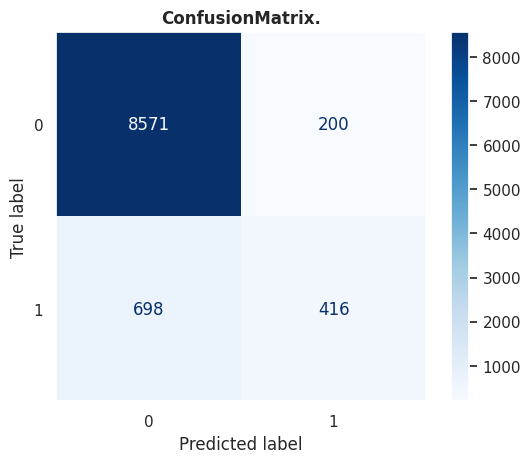

In [ ]:
#logistic Regression
from sklearn.linear_model import LogisticRegression


lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores1 = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"LogisticRegression",scores1)


cm_test = confusion_matrix(y_test, y_pred_test)
matrix = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [0, 1])
matrix.plot(cmap="Blues")
plt.title("ConfusionMatrix.", weight="bold");

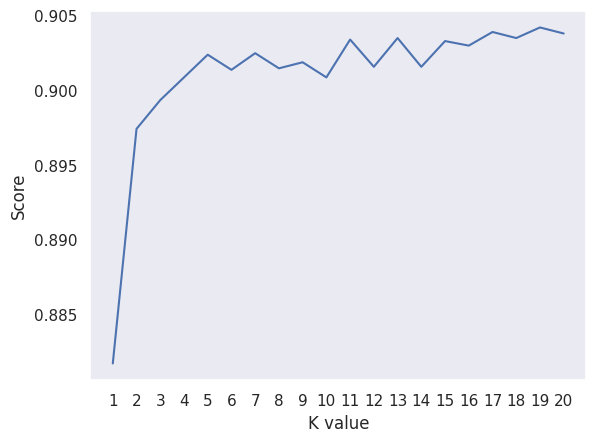

KNN best accuracy: 90.42%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

Train Accuracy: 0.908649468892261
Test Accuracy: 0.9015680323722812

            ------------------------------------------
            |  CLASSIFICATION REPORT FOR TRAIN DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     0.9196    0.9829    0.9502     20467
           1     0.7065    0.3233    0.4436      2598

    accuracy                         0.9086     23065
   macro avg     0.8131    0.6531    0.6969     23065
weighted avg     0.8956    0.9086    0.8932     23065


            ------------------------------------------
            |   CLASSIFICATION REPORT FOR TEST DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     0.9163    0.9785    0.9464      8771
           1     0.6358    0.2962    0.4042      1114

    accuracy                         0.9016      9885
   macro avg     0.7761    0.

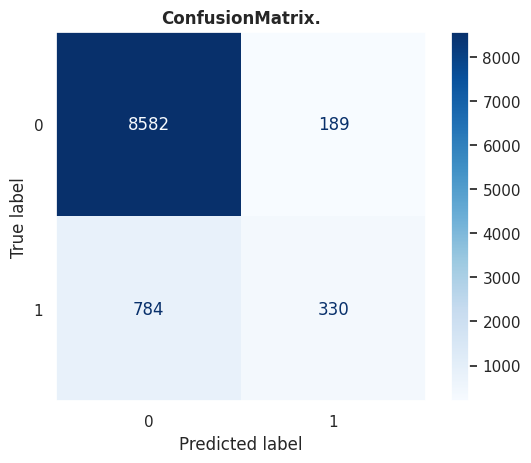

In [ ]:

from sklearn import metrics
knnclassifier=KNeighborsClassifier(n_neighbors=14)
knnclassifier.fit(X_train,y_train)
y_pred_train = knnclassifier.predict(X_train)
y_pred_test = knnclassifier.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores1 = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"KNN classifier",scores1)


cm_test = confusion_matrix(y_test, y_pred_test)
matrix = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [0, 1])
matrix.plot(cmap="Blues")
plt.title("ConfusionMatrix.", weight="bold");

In [ ]:
scores1

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Decision Tree,1.000000,1.000000,1.000000,1.000000,0.875569,0.695962,0.690610,0.693226
1,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.910167,0.686855,0.799025,0.725325
2,SVMCLASSIFIER,0.914502,0.680127,0.829932,0.725997,0.908548,0.665567,0.802692,0.707230
3,XGBOOST,0.951875,0.830229,0.914913,0.866191,0.908144,0.717844,0.778349,0.742876
4,LogisticRegression,0.905181,0.660256,0.785334,0.698966,0.909155,0.675313,0.800010,0.715573
5,KNN classifier,0.908649,0.653137,0.813057,0.696931,0.901568,0.637341,0.776066,0.675258


As we can see the model is **Overfitting** because the dataset is Imbalanced, So now let's balance the dataset by using **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [ ]:
y_train = pd.Series(y_train)
target_count = y_train.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')
print('Proportion of class 1 is ', round(target_count[1] * 100 / (target_count[0] + target_count[1]), 2),'%')

Class 0: 20467
Class 1: 20467
Proportion of class 0 is  50.0 %
Proportion of class 1 is  50.0 %


<Axes: xlabel='None', ylabel='count'>

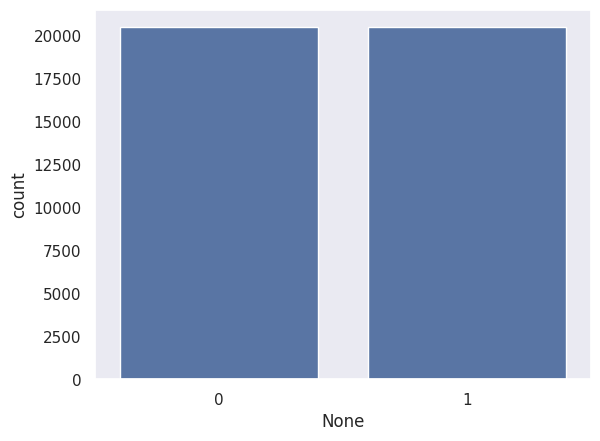

In [ ]:
sns.countplot(x = y_train)

Here we can see the data set is balanced, Now let's apply all the algorithm again and check if we got any changes in Accuracy

Train Accuracy: 0.936873992280256
Test Accuracy: 0.8642387455741022

            ------------------------------------------
            |  CLASSIFICATION REPORT FOR TRAIN DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     0.9491    0.9233    0.9360     20467
           1     0.9253    0.9505    0.9377     20467

    accuracy                         0.9369     40934
   macro avg     0.9372    0.9369    0.9369     40934
weighted avg     0.9372    0.9369    0.9369     40934


            ------------------------------------------
            |   CLASSIFICATION REPORT FOR TEST DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     0.9586    0.8852    0.9205      8771
           1     0.4362    0.6993    0.5372      1114

    accuracy                         0.8642      9885
   macro avg     0.6974    0.

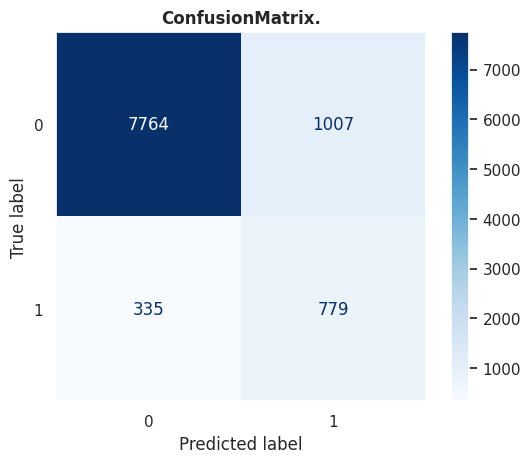

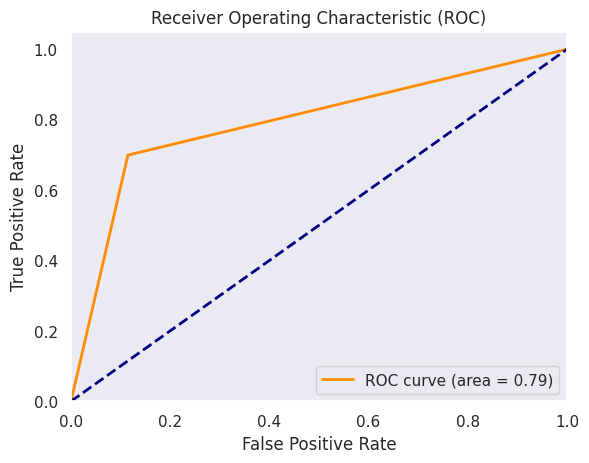

In [ ]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(max_depth = 13, random_state=40)
clf_dt.fit(X=X_train, y= y_train)

y_pred_train = clf_dt.predict(X_train)
y_pred_test = clf_dt.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"Decision Tree",scores)

cm_test = confusion_matrix(y_test, y_pred_test)
matrix = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [0, 1])
matrix.plot(cmap="Blues")
plt.title("ConfusionMatrix.", weight="bold");

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Train Accuracy: 0.9477451507304441
Test Accuracy: 0.8759736975214972

            ------------------------------------------
            |  CLASSIFICATION REPORT FOR TRAIN DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     0.9684    0.9257    0.9466     20467
           1     0.9288    0.9698    0.9489     20467

    accuracy                         0.9477     40934
   macro avg     0.9486    0.9477    0.9477     40934
weighted avg     0.9486    0.9477    0.9477     40934


            ------------------------------------------
            |   CLASSIFICATION REPORT FOR TEST DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     0.9656    0.8920    0.9273      8771
           1     0.4686    0.7496    0.5767      1114

    accuracy                         0.8760      9885
   macro avg     0.7171    0

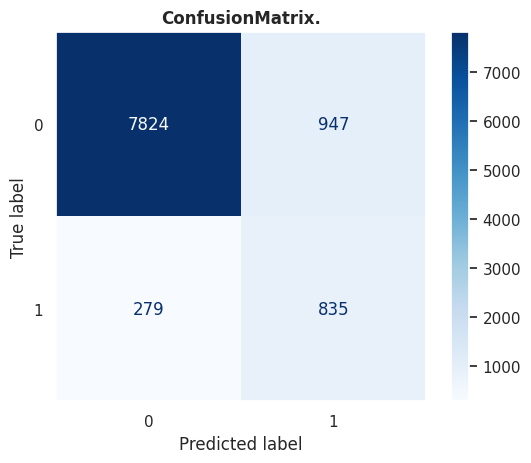

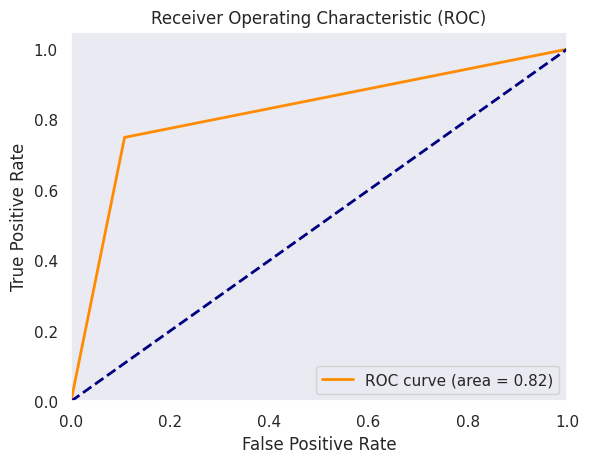

In [ ]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth = 14, random_state=40)
clf_rf.fit(X=X_train, y= y_train)

y_pred_train = clf_rf.predict(X_train)
y_pred_test = clf_rf.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"RandomForestClassifier",scores)

cm_test = confusion_matrix(y_test, y_pred_test)
matrix = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [0, 1])
matrix.plot(cmap="Blues")
plt.title("ConfusionMatrix.", weight="bold");

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Train Accuracy: 0.9184296672692627
Test Accuracy: 0.8671724835609509

            ------------------------------------------
            |  CLASSIFICATION REPORT FOR TRAIN DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     0.9445    0.8891    0.9160     20467
           1     0.8953    0.9477    0.9208     20467

    accuracy                         0.9184     40934
   macro avg     0.9199    0.9184    0.9184     40934
weighted avg     0.9199    0.9184    0.9184     40934


            ------------------------------------------
            |   CLASSIFICATION REPORT FOR TEST DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     0.9654    0.8819    0.9218      8771
           1     0.4469    0.7513    0.5604      1114

    accuracy                         0.8672      9885
   macro avg     0.7062    0

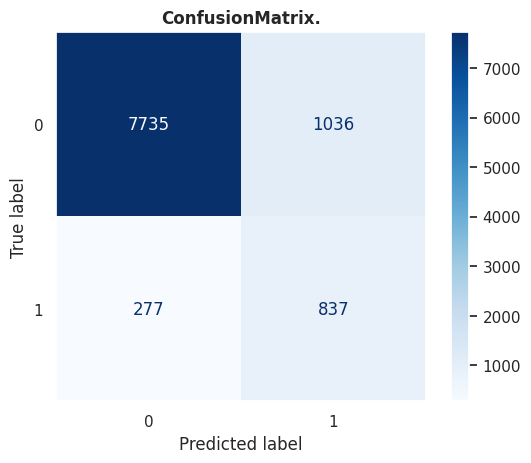

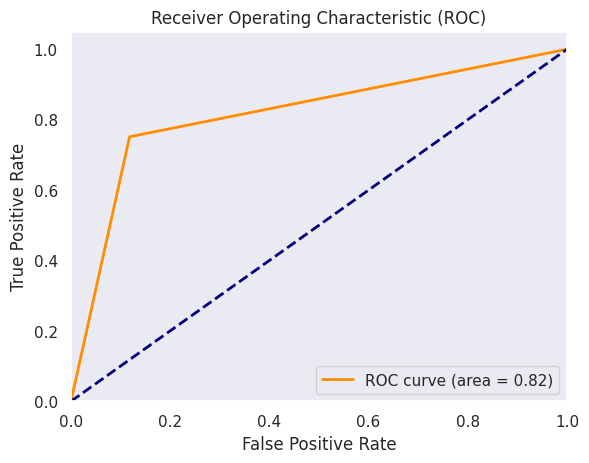

In [ ]:
# SVM
from sklearn.svm import SVC
clf_svc = SVC()
clf_svc.fit(X=X_train, y= y_train)

y_pred_train = clf_svc.predict(X_train)
y_pred_test = clf_svc.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"SVMCLASSIFIER",scores)

cm_test = confusion_matrix(y_test, y_pred_test)
matrix = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [0, 1])
matrix.plot(cmap="Blues")
plt.title("ConfusionMatrix.", weight="bold");

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Train Accuracy: 0.9397078223481702
Test Accuracy: 0.8918563480020233

            ------------------------------------------
            |  CLASSIFICATION REPORT FOR TRAIN DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     0.9465    0.9321    0.9392     20467
           1     0.9331    0.9473    0.9402     20467

    accuracy                         0.9397     40934
   macro avg     0.9398    0.9397    0.9397     40934
weighted avg     0.9398    0.9397    0.9397     40934


            ------------------------------------------
            |   CLASSIFICATION REPORT FOR TEST DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     0.9539    0.9227    0.9380      8771
           1     0.5161    0.6490    0.5750      1114

    accuracy                         0.8919      9885
   macro avg     0.7350    0

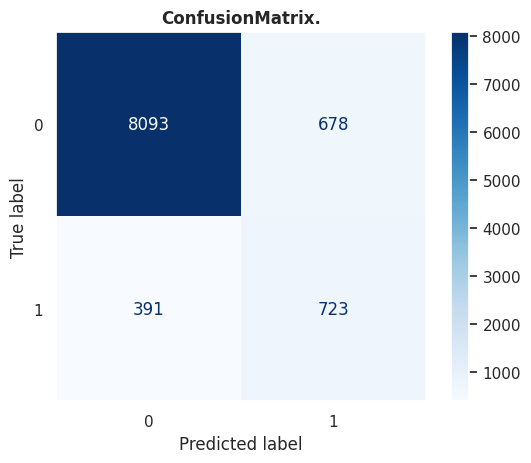

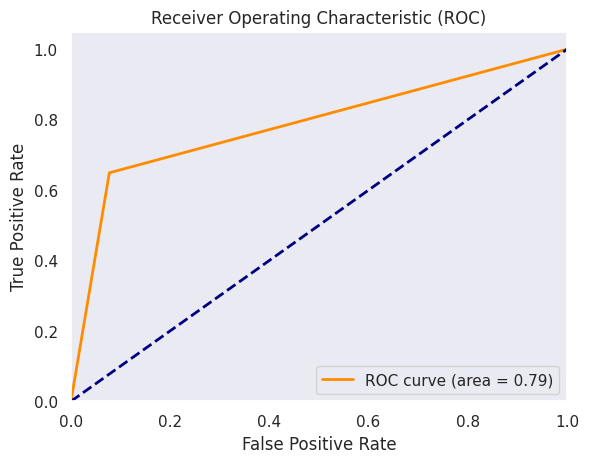

In [ ]:
# XGBClassifier

from xgboost import XGBClassifier
clf_XGB = XGBClassifier(max_depth = 4)
clf_XGB.fit(X=X_train, y= y_train)

y_pred_train = clf_XGB.predict(X_train)
y_pred_test = clf_XGB.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"XGBOOST",scores)

cm_test = confusion_matrix(y_test, y_pred_test)
matrix = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [0, 1])
matrix.plot(cmap="Blues")
plt.title("ConfusionMatrix.", weight="bold");

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Train Accuracy: 0.8915571407631797
Test Accuracy: 0.8620131512392514

            ------------------------------------------
            |  CLASSIFICATION REPORT FOR TRAIN DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     0.8926    0.8902    0.8914     20467
           1     0.8905    0.8929    0.8917     20467

    accuracy                         0.8916     40934
   macro avg     0.8916    0.8916    0.8916     40934
weighted avg     0.8916    0.8916    0.8916     40934


            ------------------------------------------
            |   CLASSIFICATION REPORT FOR TEST DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     0.9532    0.8880    0.9195      8771
           1     0.4271    0.6571    0.5177      1114

    accuracy                         0.8620      9885
   macro avg     0.6902    0

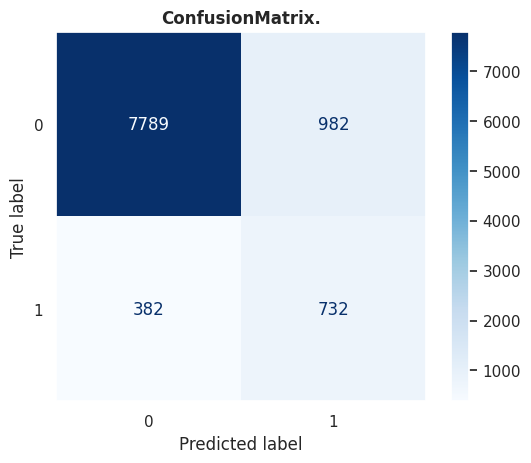

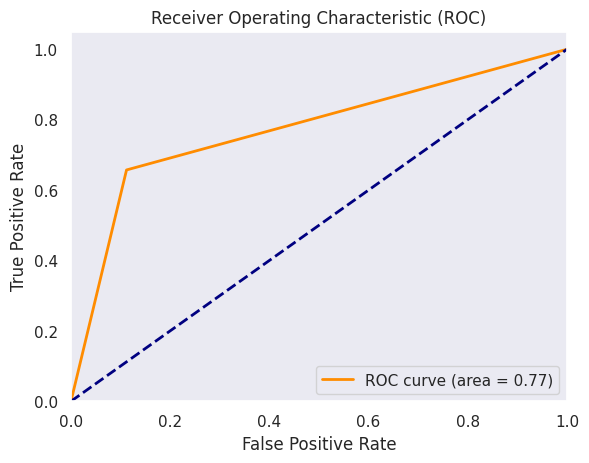

In [ ]:
#logistic Regression
from sklearn.linear_model import LogisticRegression


lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"LogisticRegression",scores)


cm_test = confusion_matrix(y_test, y_pred_test)
matrix = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [0, 1])
matrix.plot(cmap="Blues")
plt.title("ConfusionMatrix.", weight="bold");

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

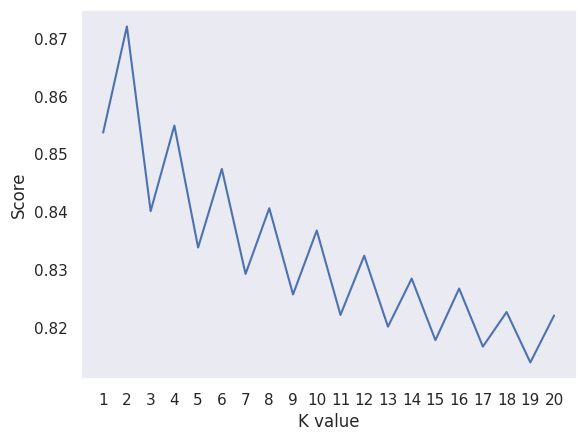

KNN best accuracy: 87.20%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

Train Accuracy: 0.9515073044412957
Test Accuracy: 0.840161861406171

            ------------------------------------------
            |  CLASSIFICATION REPORT FOR TRAIN DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     0.9936    0.9088    0.9493     20467
           1     0.9160    0.9942    0.9535     20467

    accuracy                         0.9515     40934
   macro avg     0.9548    0.9515    0.9514     40934
weighted avg     0.9548    0.9515    0.9514     40934


            ------------------------------------------
            |   CLASSIFICATION REPORT FOR TEST DATA  |
            ------------------------------------------
            
              precision    recall  f1-score   support

           0     0.9640    0.8517    0.9044      8771
           1     0.3909    0.7496    0.5138      1114

    accuracy                         0.8402      9885
   macro avg     0.6775    0.

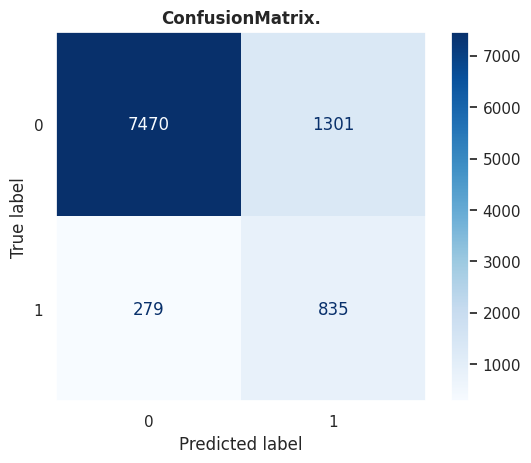

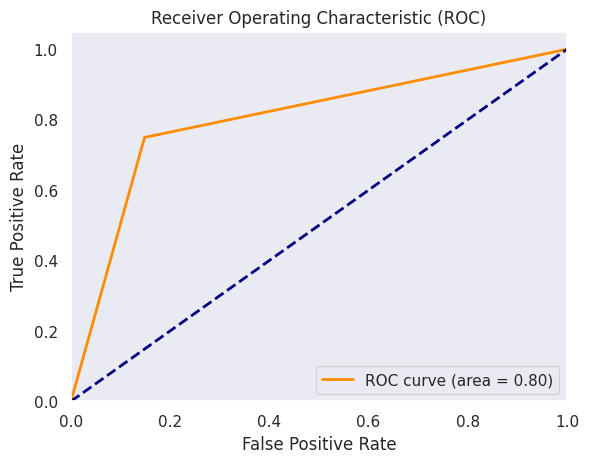

In [ ]:

from sklearn import metrics
knnclassifier=KNeighborsClassifier(n_neighbors=3)
knnclassifier.fit(X_train,y_train)
y_pred_train = knnclassifier.predict(X_train)
y_pred_test = knnclassifier.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"KNN classifier",scores)


cm_test = confusion_matrix(y_test, y_pred_test)
matrix = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [0, 1])
matrix.plot(cmap="Blues")
plt.title("ConfusionMatrix.", weight="bold");


# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Decision Tree,0.936874,0.936874,0.937197,0.936862,0.864239,0.792236,0.697404,0.728846
1,RandomForestClassifier,0.947745,0.947745,0.948618,0.947720,0.875974,0.820791,0.717071,0.752001
2,SVMCLASSIFIER,0.918430,0.918430,0.919871,0.918360,0.867172,0.816615,0.706152,0.741097
3,XGBOOST,0.939708,0.939708,0.939809,0.939704,0.891856,0.785856,0.734987,0.756499
4,LogisticRegression,0.891557,0.891557,0.891560,0.891557,0.862013,0.772566,0.690160,0.718585
5,KNN classifier,0.951507,0.951507,0.954821,0.951419,0.840162,0.800611,0.677456,0.709102


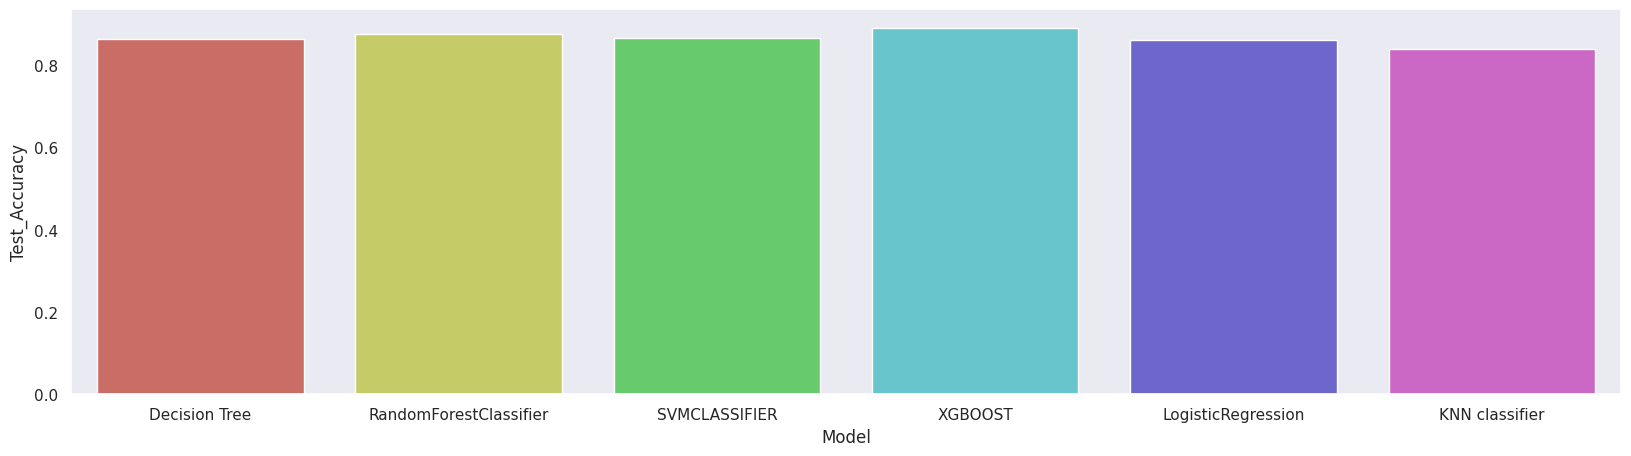

In [ ]:
plt.figure(figsize=(20,5))
sns.set(style="dark")
ax = sns.barplot(y ='Test_Accuracy',x = 'Model',data = scores, palette = 'hls')

Here , we can clearly see that XGBOOST has the best accuracy when compared to other Models



## **Conclusion**

The dataset contained 15 features and 1 target variable for binary classification which determines if client will subscribe Term deposit or not.With the given bank data, we implemented Exploratory Data Analysis, Visualized the data, Machine Learning models and evaluated the model. After pre-processsing the data, then applied various classification algorithms on the data which made it clear that XGBOOST Model performed excellent with high accuracy (89%) compared to other algorithms.